In [202]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.impute import SimpleImputer
import pandas as pd
import numpy as np

In [203]:
df = pd.read_csv("train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [204]:
y=df.Survived
df=df.drop(['Survived'],axis=1)
df=df.drop(['Name'],axis=1)
df=df.drop(['Ticket'],axis=1)
df=df.drop(['Cabin'],axis=1)
df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,3,male,22.0,1,0,7.2500,S
1,2,1,female,38.0,1,0,71.2833,C
2,3,3,female,26.0,0,0,7.9250,S
3,4,1,female,35.0,1,0,53.1000,S
4,5,3,male,35.0,0,0,8.0500,S


In [205]:
df = pd.get_dummies(df)
df.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,3,22.0,1,0,7.2500,0,1,0,0,1
1,2,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,3,26.0,0,0,7.9250,1,0,0,0,1
3,4,1,35.0,1,0,53.1000,1,0,0,0,1
4,5,3,35.0,0,0,8.0500,0,1,0,0,1


In [206]:
df.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,3,22.0,1,0,7.2500,0,1,0,0,1
1,2,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,3,26.0,0,0,7.9250,1,0,0,0,1
3,4,1,35.0,1,0,53.1000,1,0,0,0,1
4,5,3,35.0,0,0,8.0500,0,1,0,0,1


In [207]:
from sklearn.impute import SimpleImputer
df_imputer= SimpleImputer(missing_values=np.nan, strategy='mean', fill_value=0)

In [208]:
df_imputed = pd.DataFrame(df_imputer.fit_transform(df))
df_imputed.describe()

,0,1,2,3,4,5,6,7,8,9,10
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208,0.352413,0.647587,0.188552,0.086420,0.722783
std,257.353842,0.836071,13.002015,1.102743,0.806057,49.693429,0.477990,0.477990,0.391372,0.281141,0.447876
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,22.000000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000,0.000000,0.000000
50%,446.000000,3.000000,29.699118,0.000000,0.000000,14.454200,0.000000,1.000000,0.000000,0.000000,1.000000
75%,668.500000,3.000000,35.000000,1.000000,0.000000,31.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000


In [209]:
model = RandomForestRegressor(random_state=0)
df_imputed.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1.0,3.0,22.0,1.0,0.0,7.2500,0.0,1.0,0.0,0.0,1.0
1,2.0,1.0,38.0,1.0,0.0,71.2833,1.0,0.0,1.0,0.0,0.0
2,3.0,3.0,26.0,0.0,0.0,7.9250,1.0,0.0,0.0,0.0,1.0
3,4.0,1.0,35.0,1.0,0.0,53.1000,1.0,0.0,0.0,0.0,1.0
4,5.0,3.0,35.0,0.0,0.0,8.0500,0.0,1.0,0.0,0.0,1.0


In [210]:
model.fit(df_imputed,y)

C:\Users\Sherrinford\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [211]:
df_test=pd.read_csv("test.csv")
print(df_test)
df_test=df_test.drop(['Name'],axis=1)
df_test=df_test.drop(['Ticket'],axis=1)
df_test=df_test.drop(['Cabin'],axis=1)

     PassengerId  Pclass                                               Name  \
0            892       3                                   Kelly, Mr. James   
1            893       3                   Wilkes, Mrs. James (Ellen Needs)   
2            894       2                          Myles, Mr. Thomas Francis   
3            895       3                                   Wirz, Mr. Albert   
4            896       3       Hirvonen, Mrs. Alexander (Helga E Lindqvist)   
5            897       3                         Svensson, Mr. Johan Cervin   
6            898       3                               Connolly, Miss. Kate   
7            899       2                       Caldwell, Mr. Albert Francis   
8            900       3          Abrahim, Mrs. Joseph (Sophie Halaut Easu)   
9            901       3                            Davies, Mr. John Samuel   
10           902       3                                   Ilieff, Mr. Ylio   
11           903       1                         Jon

In [212]:
df_test = pd.get_dummies(df_test)

In [213]:
df_test.head()
p_id=df_test['PassengerId']

In [214]:
df_test_imputer = SimpleImputer(missing_values=np.nan, strategy='mean', fill_value=0)

In [215]:
df_test_imputed = pd.DataFrame(df_test_imputer.fit_transform(df_test))

In [216]:
df_test_imputed.head()

,0,1,2,3,4,5,6,7,8,9,10
0,892.0,3.0,34.5,0.0,0.0,7.8292,0.0,1.0,0.0,1.0,0.0
1,893.0,3.0,47.0,1.0,0.0,7.0000,1.0,0.0,0.0,0.0,1.0
2,894.0,2.0,62.0,0.0,0.0,9.6875,0.0,1.0,0.0,1.0,0.0
3,895.0,3.0,27.0,0.0,0.0,8.6625,0.0,1.0,0.0,0.0,1.0
4,896.0,3.0,22.0,1.0,1.0,12.2875,1.0,0.0,0.0,0.0,1.0


In [217]:
predictions=pd.DataFrame()
predictions["PassengerId"]=p_id
predictions["Survived"]=np.round(model.predict(df_test_imputed)).astype('int')

In [218]:
predictions.to_csv('submission.csv', index=False)

In [219]:
ans = pd.read_csv("gender_submission.csv")

In [220]:
ans= ans['Survived']

In [221]:
ans.head()

0    0
1    1
2    0
3    0
4    1
Name: Survived, dtype: int64

In [222]:
from sklearn.metrics import mean_absolute_error

In [223]:
mean_absolute_error(predictions["Survived"],ans)

0.1937799043062201

In [224]:
import matplotlib.pyplot as plt

(0, 400)

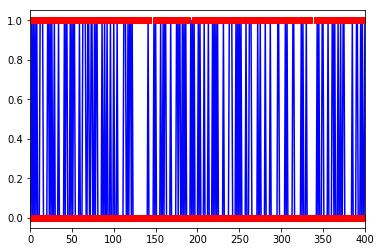

In [225]:
plt.plot(predictions["Survived"],'b',ans,'rs',)

plt.xlim([0,400])